In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


In [2]:
fake_news = pd.read_csv("fake_or_real_news.csv",index_col="Unnamed: 0") #data set
fake_news = fake_news.reset_index(drop=True)
fake_news.head(10)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [3]:
fake_news.groupby(['label'])['text'].count()

label
FAKE    3164
REAL    3171
Name: text, dtype: int64

In [4]:
fake_news['label'] = fake_news['label'].map({'FAKE': 0, 'REAL': 1})
fake_news.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


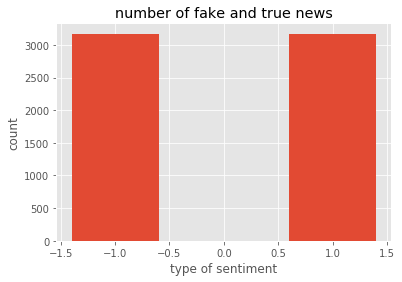

In [5]:

from matplotlib import pyplot as plt
x=[-1,1]
y=[3164, 3171]

plt.bar(x,y)
plt.xlabel('type of sentiment')
plt.ylabel('count')
plt.title('number of fake and true news')
plt.show()

In [19]:

df = pd.DataFrame()
df["text"] = fake_news['title'].map(str)+ " " + fake_news['text']
df['label'] = fake_news['label']


df['text'] = df['text'].str.lower()
only_text = pd.DataFrame()
only_text = df['text']


In [20]:

import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
only_text = only_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

a = []
b=[]
new_string = []
for i in only_text:
    #b =re.sub(p, '', i)    
    b = ' '.join([w for w in i.split() if len(w)<15])
    b = ' '.join([w for w in b.split() if len(w)>3])
    a.append(b)


    
only_text_pd = pd.DataFrame({'text':a})
only_text_se = only_text_pd['text']
only_text_se= only_text_se.str.replace('[^a-z \n]',"")
only_text_se = only_text_se.str.replace('fake|real', "")

only_text_se[23] #processed text

'senate majority leaders main goal gop dont scary mitch mcconnell unusual admonition republican majority takes senate week dont scary incoming senate majority leader political goal next years overseeing functioning reasonable majority capitol hill scores measured conservative wins particularly environmental regulations probably victories full repeal healthcare law mcconnells priority stage potential presidential victory  dont want american people think republican president republican congress thats going scary outcome want american people comfortable fact republican house senate responsible governing majority kentucky republican said broad interview christmas capitol office its defiant declaration  single important goal make president obama oneterm president antagonizing oath democrats frequently invoke embarrass leader obama reelection comfortably  mcconnells party lost seats charge ends capitol republicans avoid worst excesses past four years make sure public isnt fearful gops course

In [21]:
only_text[23]

'new senate majority leader’s main goal gop: don’t scary mitch mcconnell unusual admonition new republican majority takes senate week: don’t “scary.” incoming senate majority leader set political goal next two years overseeing functioning, reasonable majority capitol hill scores measured conservative wins, particularly environmental regulations, probably big victories full repeal health-care law. mcconnell’s priority set stage potential gop presidential victory 2016. “i don’t want american people think add republican president republican congress, that’s going scary outcome. want american people comfortable fact republican house senate responsible, right-of-center, governing majority,” kentucky republican said broad interview christmas capitol office. it’s far cry defiant declaration 2010 “single important” goal make president obama one-term president, antagonizing oath democrats frequently invoke embarrass gop leader — obama reelection comfortably 2012, mcconnell’s party lost seats. c

In [22]:

X= only_text_se
y= df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4751,)
(1584,)
(4751,)
(1584,)


In [23]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = CountVectorizer(stop_words='english',max_df=.3)

In [24]:

X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

<4751x65285 sparse matrix of type '<class 'numpy.int64'>'
	with 1126936 stored elements in Compressed Sparse Row format>

In [25]:

X_test_dtm = vect.transform(X_test)
X_test_dtm

<1584x65285 sparse matrix of type '<class 'numpy.int64'>'
	with 369555 stored elements in Compressed Sparse Row format>

### Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train_dtm, y_train)
y_pred_class_test = nb.predict(X_test_dtm)
y_pred_class_train = nb.predict(X_train_dtm)

In [27]:
nb.predict(X_test_dtm)

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [28]:
X_test.iloc[1]

'announces troop deployment near russias borders military british defense secretary michael fallon photo afp british defense minister michael fallon says deploy hundreds troops baltic region europe support nato allies face more assertive russia fallon told nato ministerial meeting brussels wednesday britain would send soldiers estonia fulfill pledge deliver four battalions natos enhanced forward presence eastern europe backed rising defense budget deployment air land forces shows continue play leading role nato supporting defense security allies north south alliance fallon said nato announced july would deploy rotational basis four multinational battalions poland baltic latvia lithuaniato deter referred any russian incursion address meeting fallon also said four british typhoon fighter jets would dispatched romania nato southern policing mission supposed protect baltic states airspace possible attacks russia this things reassurance needs done formidable presence deterrence fallon said 

In [29]:

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class_test))
print(metrics.accuracy_score(y_train, y_pred_class_train))

0.8869949494949495
0.9444327509997895


In [30]:

from sklearn.metrics import confusion_matrix
m = metrics.confusion_matrix(y_test, y_pred_class_test)


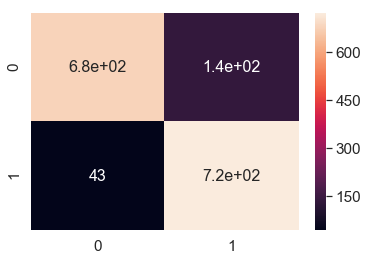

In [31]:
import seaborn as sns
import matplotlib
%matplotlib inline
cm = metrics.confusion_matrix(y_test, y_pred_class_test)
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={"size": 16})

In [32]:

y_test.value_counts()

0    817
1    767
Name: label, dtype: int64

In [33]:

X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

65285

In [34]:

print(X_train_tokens[0:50])

['aa', 'aaaa', 'aaas', 'aab', 'aachen', 'aadhar', 'aadmi', 'aae', 'aaiball', 'aakar', 'aakhri', 'aalia', 'aaliya', 'aaliyas', 'aall', 'aamaq', 'aamon', 'aap', 'aapke', 'aapko', 'aapne', 'aarhus', 'aaron', 'aarons', 'aaronson', 'aaronsons', 'aarp', 'aart', 'aas', 'aaso', 'aata', 'aauw', 'aauws', 'aaye', 'aayush', 'ab', 'abaaoud', 'abaaouds', 'ababa', 'aback', 'abad', 'abadi', 'abadis', 'abaldo', 'aban', 'abandon', 'abandoned', 'abandonedover', 'abandoning', 'abandonment']


In [35]:
print(nb.feature_count_.shape)
print(nb.feature_count_)
fake_token_count = nb.feature_count_[0, :]
print(fake_token_count)

(2, 65285)
[[3. 1. 1. ... 1. 0. 2.]
 [0. 0. 0. ... 0. 3. 0.]]
[3. 1. 1. ... 1. 0. 2.]


In [36]:
# number of times each token appears across all real articles
real_token_count = nb.feature_count_[1, :]
real_token_count

array([0., 0., 0., ..., 0., 3., 0.])

In [37]:
# create a DataFrame of tokens with their separate real and fake counts
tokens = pd.DataFrame({'token':X_train_tokens, 'real':real_token_count, 'fake':fake_token_count}).set_index('token')

In [38]:
freq_real = tokens.sort_values(by='real', ascending = False)
freq_real = freq_real.drop('fake',1)
freq_real.head()

,real
token,
obama,3558.0
party,2756.0
house,2736.0
sanders,2648.0
percent,2611.0


In [39]:
freq_fake = tokens.sort_values(by='fake', ascending = False)
freq_fake = freq_fake.drop('real',1)
freq_fake = freq_fake.drop(freq_fake.index[[3]])
freq_fake.head()



,fake
token,
world,2234.0
government,1984.0
obama,1526.0
russia,1432.0
united,1353.0


In [40]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([2347., 2404.])

In [41]:

tokens['real'] = tokens.real + 1
tokens['fake'] = tokens.fake + 1
tokens.sample(5, random_state=6)

,real,fake
token,,
anytime,31.0,7.0
magnification,1.0,2.0
honored,30.0,15.0
misguidedly,2.0,1.0
repent,2.0,3.0


In [42]:

tokens['real'] = tokens.real / nb.class_count_[0]
tokens['fake'] = tokens.fake / nb.class_count_[1]
tokens.sample(5, random_state=6)

,real,fake
token,,
anytime,0.013208,0.002912
magnification,0.000426,0.000832
honored,0.012782,0.006240
misguidedly,0.000852,0.000416
repent,0.000852,0.001248


In [43]:
# calculate the ratio of fake to real for each token
tokens['fake_ratio'] = tokens.fake / tokens.real
tokens.sample(5, random_state=6)

,real,fake,fake_ratio
token,,,
anytime,0.013208,0.002912,0.220452
magnification,0.000426,0.000832,1.952579
honored,0.012782,0.006240,0.488145
misguidedly,0.000852,0.000416,0.488145
repent,0.000852,0.001248,1.464434


In [44]:

tokens['real_ratio'] = tokens.real / tokens.fake
tokens.sample(5, random_state=6)

,real,fake,fake_ratio,real_ratio
token,,,,
anytime,0.013208,0.002912,0.220452,4.536125
magnification,0.000426,0.000832,1.952579,0.512143
honored,0.012782,0.006240,0.488145,2.048573
misguidedly,0.000852,0.000416,0.488145,2.048573
repent,0.000852,0.001248,1.464434,0.682858


In [45]:

tokens_real = tokens.sort_values('real_ratio', ascending=False).head(5)

In [46]:
tokens_real

,real,fake,fake_ratio,real_ratio
token,,,,
fiorina,0.140179,0.000832,0.005935,168.495100
frontrunner,0.149979,0.001248,0.008321,120.182929
boehner,0.197273,0.001664,0.008434,118.561142
caucuses,0.127397,0.001248,0.009796,102.087204
lewandowski,0.040051,0.000416,0.010386,96.282914


## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
seed=12
logreg = LogisticRegression(C=2, random_state=12, class_weight='balanced')

In [48]:
logreg.fit(X_train_dtm, y_train)

C:\Users\Arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=12,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [49]:
y_log_pred_test = logreg.predict(X_test_dtm)
y_log_pred_train = logreg.predict(X_train_dtm)

In [50]:
metrics.accuracy_score(y_test, y_log_pred_test)


0.9065656565656566

In [51]:
metrics.accuracy_score(y_train, y_log_pred_train)

1.0

In [52]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_log_pred_test)

array([[743,  74],
       [ 74, 693]], dtype=int64)

## Random Forest

In [53]:

from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=25)
RF_clf.fit(X_train_dtm, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:

RF_clf.fit(X_train_dtm, y_train)
y_rf_pred_test = RF_clf.predict(X_test_dtm)
y_rf_pred_train = RF_clf.predict(X_train_dtm)
probs_rf = RF_clf.predict_proba(X_test_dtm)

In [55]:
probs_rf = RF_clf.predict_proba(X_test_dtm) 
probs_rf

array([[0.12, 0.88],
       [0.64, 0.36],
       [0.72, 0.28],
       ...,
       [0.56, 0.44],
       [0.44, 0.56],
       [0.28, 0.72]])

In [56]:
probs = probs_rf[:,1]  

In [57]:
probs[probs > 0.5] =1  
probs[probs <= 0.5] = 0
probs

array([1., 0., 0., ..., 0., 1., 1.])

In [58]:
metrics.accuracy_score(y_test, probs)  

0.8642676767676768

In [59]:
#good accuracy on test data
metrics.accuracy_score(y_test, y_rf_pred_test) 

0.8642676767676768

In [60]:
#overfitting on train dataa
metrics.accuracy_score(y_train, y_rf_pred_train)


0.999368553988634

In [61]:
#for separating each category
X= only_text_se
y= df['label']


Xy = pd.concat([X,y], axis=1)

fake = Xy[Xy['text'].notnull() & (Xy['label'] == 0)]

real = Xy[Xy['text'].notnull() & (Xy['label'] == 1)]


print(fake.shape)
print(real.shape)


Xy.groupby(['label'])['text'].count()

(3164, 2)
(3171, 2)


label
0    3164
1    3171
Name: text, dtype: int64

In [62]:
#exporting to form word cloud
fake = fake[['text']]
real = real[['text']]

fake.to_csv('fake.txt', header=None, index=None, sep=' ', mode='a')
real.to_csv('real.txt', header=None, index=None, sep=' ', mode='a')


#importing the text format
with open('fake.txt', 'r') as input_file:
    fake = input_file.read()
    
with open('real.txt', 'r') as input_file:
    real = input_file.read()
    

